In this notebook, we want to find where perfusion failed & why it failed. We only want to do this for the perfusion things we're going to use. Therefore, we should take the 4th parse, because the ones after that might be fixed (imaging might be quantified, pathology might appear from Joanna & Anny) 

In [87]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)


In [88]:
recgli = read.csv("../AnnotateData/10thAnnot_researchPath_withInVivo.csv")

In [89]:
dim(recgli)

[1] 627  72

In [90]:
head(recgli)

b_number t_number sf_number current_scan_date current_surgery_date
1 2723     6369     8122      9/13/09           9/14/09             
2 2312     5317     7679      5/4/08            5/4/08              
3 2901     8089     8403      6/25/10           6/30/10             
4 2474     7408     8701      3/23/11           3/24/11             
5 3169     7540     8796      6/19/11           6/20/11             
6 2312     5317     7679      5/4/08            5/4/08              
  current_hist_grade current_hist_type roi.label tumor_cell_evaluation necrosis
1 Grade IV           Glioblastoma      10B28     0                     0       
2 Grade IV           Glioblastoma      11B16     2                     1       
3 Grade IV           Glioblastoma      11B35     3                     2       
4 Grade IV           Glioblastoma      11B40                                   
5 Grade IV           Glioblastoma      11B43     2                     0       
6 Grade IV           Glioblastoma      12B16     2                     1       
  f8_delicate f8_simple f8_complex mib_1 bx_pure_treatment_effect nfse nfl 
1 2           1         0           0.82 t                        2.10 1.84
2 2           3         0           3.31 f                        2.27 1.44
3 1           0         0             NA f                          NA   NA
4                                     NA                          1.84 1.13
5 3           0         0          17.00 f                        2.35 1.97
6 3           2         0          12.84 f                        2.20 1.56
  nt1c nt1v nadc.1 nfa.1 nev1.1 nev2.1 nev3.1 nevrad.1 nadc.2 nfa.2 nev1.2
1 1.20 0.84 1.31   0.75  1.19   1.28   1.58   1.45       NA     NA    NA  
2 1.88 0.78 1.92   0.68  1.63   1.93   2.34   2.14     1.91   1.03  1.91  
3   NA   NA   NA     NA    NA     NA     NA     NA       NA     NA    NA  
4 0.82 0.79 1.71   0.50  1.35   1.79   2.47   2.12     1.71   0.68  1.43  
5 0.76 0.78 1.34   0.68  1.13   1.34   1.63   1.50       NA     NA    NA  
6 2.04 0.74 2.04   0.89  1.83   2.12   2.22   2.23     1.75   0.69  1.54  
  nev2.2 nev3.2 nevrad.2 cbvn_nlin phn_nlin            phn_npar recovn_npar
1   NA     NA     NA     0.66      0.81                0.79     100.00     
2 1.87   1.88   1.92     2.24      2.25                2.25      98.51     
3   NA     NA     NA       NA      biopsymask-nonexist   NA         NA     
4 1.72   2.02   1.96     1.23      1.28                1.21     100.00     
5   NA     NA     NA     0.58      0.67                0.60     100.00     
6 1.72   2.16   1.96     1.71      1.73                1.88      99.20     
  cni  ccri crni ncho ncre nnaa nlip  laclip nlac olddata newdata
1 4.98 3.28 0.24 1.65 0.53 0.41 -0.01 0.27   0.28 1       0      
2 1.56 0.30 0.75 0.86 0.84 0.46  0.61 1.08   0.47 1       0      
3   NA   NA   NA   NA   NA   NA    NA   NA     NA 1       0      
4 2.48 0.22 1.66 0.88 0.81 0.37  0.24 0.56   0.32 1       0      
5   NA   NA   NA   NA   NA   NA    NA   NA     NA 1       0      
6 2.46 1.30 0.55 1.19 0.87 0.59  0.34 0.83   0.49 1       0      
  comments                                                                          
1                                                                                   
2                                                                                   
3                                                                                   
4                                                                                   
5                                                                                   
6 PP necrosis; some hyalinized BV; tissue is 2/3 tumor score of 3 and 1/3 score of 1
  notes. imaging_code perf_quant spec_quant include_anat include_diffu1000
1 NA     NA            0          0         1            1                
2 NA     NA            0          0         1            1                
3 NA     biopsy_quant NA         NA         0            0                
4 NA     NA  

In [91]:
data.frame(index = 1:length(colnames(recgli)), colnames = colnames(recgli))

index colnames                 
1   1    b_number                 
2   2    t_number                 
3   3    sf_number                
4   4    current_scan_date        
5   5    current_surgery_date     
6   6    current_hist_grade       
7   7    current_hist_type        
8   8    roi.label                
9   9    tumor_cell_evaluation    
10 10    necrosis                 
11 11    f8_delicate              
12 12    f8_simple                
13 13    f8_complex               
14 14    mib_1                    
15 15    bx_pure_treatment_effect 
16 16    nfse                     
17 17    nfl                      
18 18    nt1c                     
19 19    nt1v                     
20 20    nadc.1                   
21 21    nfa.1                    
22 22    nev1.1                   
23 23    nev2.1                   
24 24    nev3.1                   
25 25    nevrad.1                 
26 26    nadc.2                   
27 27    nfa.2                    
28 28    nev1.2                   
29 29    nev2.2                   
30 30    nev3.2                   
31 31    nevrad.2                 
32 32    cbvn_nlin                
33 33    phn_nlin                 
34 34    phn_npar                 
35 35    recovn_npar              
36 36    cni                      
37 37    ccri                     
38 38    crni                     
39 39    ncho                     
40 40    ncre                     
41 41    nnaa                     
42 42    nlip                     
43 43    laclip                   
44 44    nlac                     
45 45    olddata                  
46 46    newdata                  
47 47    comments                 
48 48    notes.                   
49 49    imaging_code             
50 50    perf_quant               
51 51    spec_quant               
52 52    include_anat             
53 53    include_diffu1000        
54 54    include_diffu2000        
55 55    include_diffu_all        
56 56    include_perf             
57 57    include_spec             
58 58    include_one_advanced_mod 
59 59    include_all_advanced_mods
60 60    X.CEL                    
61 61    X.NEL                    
62 62    X.NEC                    
63 63    sum                      
64 64    in_CEL                   
65 65    in_T2all                 
66 66    in_NEL                   
67 67    in_NEC                   
68 68    in_ROI                   
69 69    multnom_out              
70 70    no_ffpe                  
71 71    waiting_on_path          
72 72    rhgg_txe_analysis

## 1. Graph perfusion parameters to see where and how fitting may have failed: 

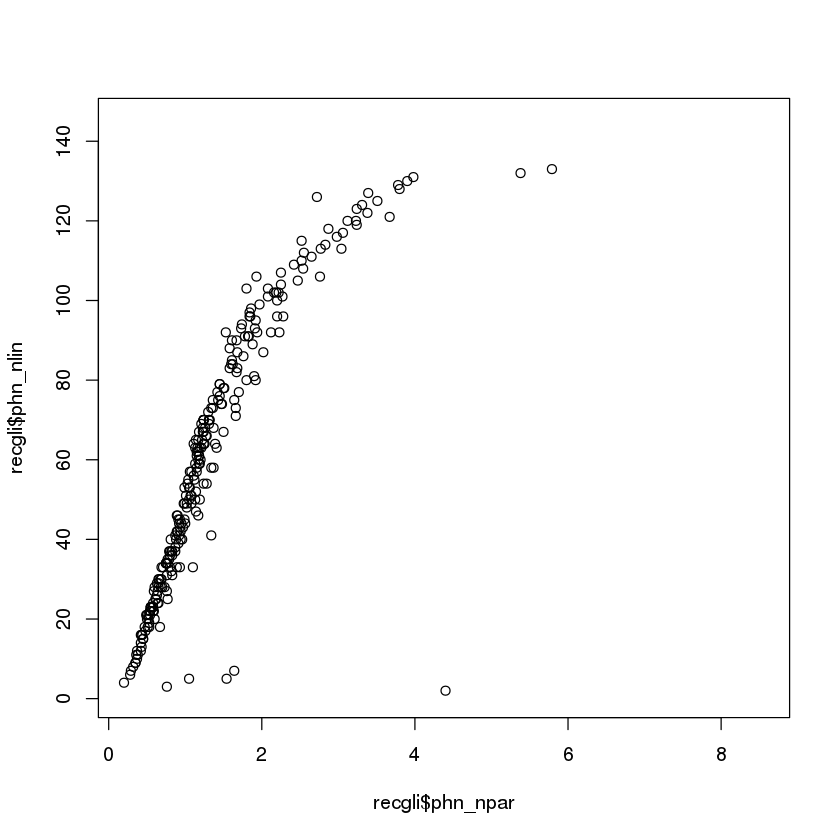

In [92]:
plot(recgli$phn_npar, recgli$phn_nlin)

In [93]:
recgli[which(recgli$phn_npar > 0.2 & recgli$phn_nlin < 0.2 ),]


Warning message in Ops.factor(recgli$phn_nlin, 0.2):
“‘<’ not meaningful for factors”

b_number t_number sf_number current_scan_date current_surgery_date
     current_hist_grade current_hist_type roi.label tumor_cell_evaluation
     necrosis f8_delicate f8_simple f8_complex mib_1 bx_pure_treatment_effect
     nfse nfl nt1c nt1v nadc.1 nfa.1 nev1.1 nev2.1 nev3.1 nevrad.1 nadc.2 nfa.2
     nev1.2 nev2.2 nev3.2 nevrad.2 cbvn_nlin phn_nlin phn_npar recovn_npar cni
     ccri crni ncho ncre nnaa nlip laclip nlac olddata newdata comments notes.
     imaging_code perf_quant spec_quant include_anat include_diffu1000
     include_diffu2000 include_diffu_all include_perf include_spec
     include_one_advanced_mod include_all_advanced_mods X.CEL X.NEL X.NEC sum
     in_CEL in_T2all in_NEL in_NEC in_ROI multnom_out no_ffpe waiting_on_path
     rhgg_txe_analysis

In [94]:
# since phn_nlin has quant_failure notifications, let's place the character values of phn_nlin into a separate column:
recgli = data.frame(recgli, perf_failure_reasons = recgli$phn_nlin)
dim(recgli)

[1] 627  73

In [95]:
recgli$perf_failure_reasons = gsub("[[:digit:]]", "", as.character(recgli$perf_failure_reasons))


In [96]:
recgli$perf_failure_reasons

[1] "."                     "."                     "biopsymask-nonexist"  
  [4] "."                     "."                     "."                    
  [7] "."                     ""                      "biopsymask-nonexist"  
 [10] "."                     "."                     "biopsymask-nonexist"  
 [13] "."                     "."                     "."                    
 [16] "."                     "."                     "."                    
 [19] ""                      "."                     "."                    
 [22] "."                     "."                     ""                     
 [25] "."                     "t_B_outside_perfusion" "."                    
 [28] "."                     "biopsymask-nonexist"   NA                     
 [31] "."                     "."                     ""                     
 [34] "biopsymask-nonexist"   ""                      "biopsymask-nonexist"  
 [37] "perf_align-nonexist"   "perf_align-nonexist"   "biopsymask-nonexist"  
 [40] "biopsymask-nonexist"   "biopsymask-nonexist"   "biopsymask-nonexist"  
 [43] "biopsymask-nonexist"   ""                      ""                     
 [46] "."                     "."                     "."                    
 [49] "."                     ""                      "."                    
 [52] "."                     "."                     "biopsymask-nonexist"  
 [55] NA                      NA                      "."                    
 [58] "perf_align-nonexist"   "."                     "perf_align-nonexist"  
 [61] "."                     "perf_align-nonexist"   "."                    
 [64] "."                     "."                     "."                    
 [67] "."                     "perf_align-nonexist"   "."                    
 [70] "."                     "."                     "."                    
 [73] "."                     "."                     ""                     
 [76] "."                     "."                     "biopsymask-nonexist"  
 [79] "."                     "."                     NA                     
 [82] ""                      "."                     "."                    
 [85] "."                     NA                      ""                     
 [88] NA                      "biopsymask-nonexist"   "."                    
 [91] "."                     "."                     NA                     
 [94] "."                     "."                     "."                    
 [97] "."                     "."                     "."                    
[100] "."                     "."                     ""                     
[103] "."                     "."                     "biopsymask-nonexist"  
[106] "."                     "."                     "biopsymask-nonexist"  
[109] "."                     "t_B_outside_perfusion" "."                    
[112] NA                      "."                     "."                    
[115] "biopsymask-nonexist"   "perf_align-nonexist"   "."                    
[118] "PERF_BIOPSY_ISSUE"     "biopsymask-nonexist"   "perf_align-nonexist"  
[121] "."                     ""                      "PERF_BIOPSY_ISSUE"    
[124] "biopsymask-nonexist"   "."                     ""                     
[127] "biopsymask-nonexist"   "."                     ""                     
[130] "."                     ""                      ""                     
[133] "t_B_outside_perfusion" "."                     "."                    
[136] "."                     "t_B_outside_perfusion" "."                    
[139] "."                     "."                     NA                     
[142] "."                     "."                     "."                    
[145] ""                      "."                     "biopsymask-nonexist"  
[148] "."                     "."                     "."                    
[151] "."                     "."                     "."                    
[154] "."               

In [98]:
recgli[recgli$newdata ==1,]

b_number t_number sf_number current_scan_date current_surgery_date
317 1338      8773     9727     2013-10-02        2013-10-03          
318 1338      8773     9727     2013-10-02        2013-10-03          
319 1338      8773     9727     2013-10-02        2013-10-03          
320 1338      8773     9727     2013-10-02        2013-10-03          
321 2947      8775     9729     2013-10-06        2013-10-07          
322 2947      8775     9729     2013-10-06        2013-10-07          
323 2947      8775     9729     2013-10-06        2013-10-07          
324 2947      8775     9729     2013-10-06        2013-10-07          
325 3472      8783     9739     2013-10-14        2013-10-15          
326 3472      8783     9739     2013-10-14        2013-10-15          
327 3499      8869     9795     2013-12-10        2013-12-11          
328 3499      8869     9795     2013-12-10        2013-12-11          
329 3125      8878     9801     2013-12-15        2013-12-16          
330 3125      8878     9801     2013-12-15        2013-12-16          
331 3125      8878     9801     2013-12-15        2013-12-16          
332 3125      8878     9801     2013-12-15        2013-12-16          
333 3526      8943     9882     2014-02-20        2014-02-21          
334 3526      8943     9882     2014-02-20        2014-02-21          
335 3526      8943     9882     2014-02-20        2014-02-21          
336 3527      8944     9891     2014-02-25        2014-02-26          
337 3527      8944     9891     2014-02-25        2014-02-26          
338 3533      8956     9907     2014-03-12        2014-03-13          
339 3533      8956     9907     2014-03-12        2014-03-13          
340 1837      8960     9913     2014-03-18        2014-03-20          
341 1837      8960     9913     2014-03-18        2014-03-20          
342 1837      8960     9913     2014-03-18        2014-03-20          
343 3541      8977     9936     2014-04-14        2014-04-15          
344 3541      8977     9936     2014-04-14        2014-04-15          
345 3541      8977     9936     2014-04-14        2014-04-15          
346 3541      8977     9936     2014-04-14        2014-04-15          
347 3542      8995     9956     2014-04-30        2014-05-01          
348 3542      8995     9956     2014-04-30        2014-05-01          
349 3542      8995     9956     2014-04-30        2014-05-01          
350 3542      8995     9956     2014-04-30        2014-05-01          
351 3548      9000     9971     2014-05-12        2014-05-13          
352 3548      9000     9971     2014-05-12        2014-05-13          
353 3548      9000     9971     2014-05-12        2014-05-13          
354 3548      9000     9971     2014-05-12        2014-05-13          
355 2456      9014     9992     2014-05-29        2014-05-30          
356 2456      9014     9992     2014-05-29        2014-05-30          
357 2456      9014     9992     2014-05-29        2014-05-30          
358 2456      9014     9992     2014-05-29        2014-05-30          
359 3577      9063    10012     2014-06-15        2014-06-16          
360 3577      9063    10012     2014-06-15        2014-06-16          
361 3577      9063    10012     2014-06-15        2014-06-16          
362 3577      9063    10012     2014-06-15        2014-06-16          
363 3588      9084    10024     2014-06-29        2014-06-30          
364 3588      9084    10024     2014-06-29        2014-06-30          
365 3589      9085    10025     2014-06-30        2014-07-01          
366 3589      9085    10025     2014-06-30        2014-07-01          
367 3589      9085    10025     2014-06-30        2014-07-01          
368 3519      9119    10064     2014-08-04        2014-08-05          
369 3519      9119    10064     2014-08-04        2014-08-05          
370 3605      9127    10070     2014-08-11        2014-08-12          
371 3605      9127    10070     2014-08-11        2014-08-12          
372 3605      9127    10070 